In [1]:
import sys
import numpy as np
import scipy.sparse as sp

## 23. Graph example with plot

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

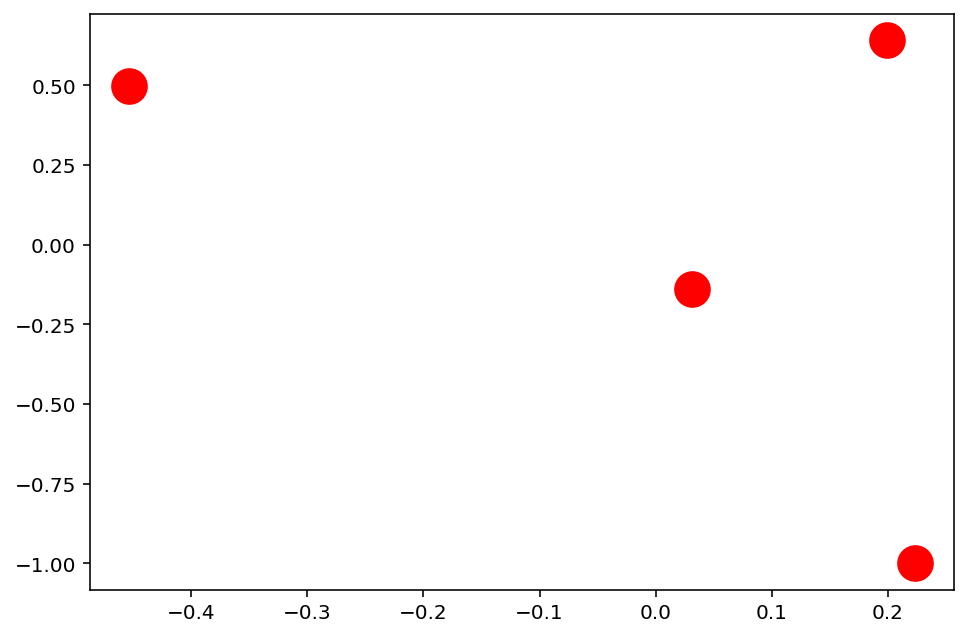

In [2]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(1, 1), (1, 2), (2, 3), (3, 1), (1, 4)])
nx.draw(G, with_labels=True)

# Functions and scripts

## 51. @-functions -> lambda functions

When presenting this to students I think it should be made clear that you would only use a lambda function if you need the function right now, i.e., you don't usually define a function with a lambda function; you would use a regular function (using `def`).
Examples on slide 68 should make that clear I think, but it's something to be aware of.

In [5]:
a = 2
f = lambda x: a * x*x
f(np.array([3, 4]))  # f([3, 4]) gives TypeError: can't multiply sequence by non-int of type 'list'

array([18, 32])

Similar to MATLAB: lambda function can return only one value.
(Try to execute the following: That call should return: 
<div class="alert-danger">TypeError: 'tuple' object is not callable ...</div>

In [6]:
g = lambda x: x, 2
g(3)

TypeError: 'tuple' object is not callable

In [7]:
def h(x):
    return x, 2
h(3)

(3, 2)

## 52. @-functions examples (magic)

In [8]:
v = np.array([6, 1, 3, 2, 4, 2, 4, 5])

Note: `map` is a standard function in Python, returning a map object.
This map object has to be transformed to a list with `list(.)` (pure Python) **and** then with `np.array(.)` (numpy/scipy).

In [ ]:
np.array(list(map(lambda x: x*x, v)))

In Python, it is more common to use a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions), and cast the list to a numpy array.
The running time is more or less the same [[SO](https://stackoverflow.com/a/46470401/6629569)].
For squaring each element in a list, note that it's fastest (and shortest) to write simply `v**2`.

In [9]:
np.array([x**2 for x in v])

array([36,  1,  9,  4, 16,  4, 16, 25])

Omiting the `np.array(.)` call for clarity, for the rest of the examples.

In [10]:
[x**2 for x in []]

[]

In [11]:
max(v)

6

In [12]:
min(v)

1

In [13]:
sorted(v)

[1, 2, 2, 3, 4, 4, 5, 6]

In [14]:
np.exp(1)

2.718281828459045

In [15]:
def g(x):
    return x*x

[g(x) for x in v]


[36, 1, 9, 4, 16, 4, 16, 25]

The following also works:

In [16]:
g(v)

array([36,  1,  9,  4, 16,  4, 16, 25])

(small example to show that the MATLAB example also works in Python, but you would use a (local) function definition instead of a lambda function.)

In [17]:
list(map(g, v))

[36, 1, 9, 4, 16, 4, 16, 25]

In [18]:
def h(x):
    return -x

def f(x):
    return np.multiply(h(x), x>4) + np.multiply(g(x), x <= 4)

f(v)

array([-6,  1,  9,  4, 16,  4, 16, -5])

# Numbers

## 66, 69. Decimal to binary

In [19]:
np.binary_repr(6)

'110'

In [20]:
np.binary_repr(-6)

'-110'

## 67. Real numbers

3. max real IEEE 64 bit (same as matlab) $1.7976 \cdot 10^{308}$

In [21]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

max real 128 bit $1.1897 \cdot 10^{4932}$, from:

In [22]:

np.finfo(np.float128)

finfo(resolution=1.0000000000000000715e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

4. Force overflow. Inserting one 0 more also gives M (what could be the reason ...?)

In [23]:
M = np.finfo(np.float128).max
1.000000000000001 * M

/Users/willems/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in longdouble_scalars
  


inf

## 70. Smallest (positive) computer real

In [24]:
for i in np.arange(46, 55 + 1):
    a = 1 + np.power(2, -np.float(i))
    print(f"(1 + 2^-{i}) - 1 = {a - 1}")

(1 + 2^-46) - 1 = 1.4210854715202004e-14
(1 + 2^-47) - 1 = 7.105427357601002e-15
(1 + 2^-48) - 1 = 3.552713678800501e-15
(1 + 2^-49) - 1 = 1.7763568394002505e-15
(1 + 2^-50) - 1 = 8.881784197001252e-16
(1 + 2^-51) - 1 = 4.440892098500626e-16
(1 + 2^-52) - 1 = 2.220446049250313e-16
(1 + 2^-53) - 1 = 0.0
(1 + 2^-54) - 1 = 0.0
(1 + 2^-55) - 1 = 0.0


## 67,71. Largest computer numbers (int)

From [numpy docs](https://numpy.org/devdocs/user/basics.types.html): $9223372036854775807$


## 73. Real number computer representation

A very clear (infamous?) example of computer real-value round-off of errors:

In [27]:
0.1 + 0.2 == 0.3

False

Examples from the slides:

In [28]:
(1/10) * 7 - (7/10)

1.1102230246251565e-16

In [29]:
(1/3) * 7 - (7/3)

-4.440892098500626e-16

In [30]:
np.sin(np.pi / 4) - np.sqrt(2) / 2

-1.1102230246251565e-16

In [31]:
np.log(np.power(np.exp(1), 2)) - 2

0.0

## 77. Round-off consequences

Checking if matrix is symmetrical with numpy: `np.allclose(A, A.T, rtol=0, atol = 0, equal_nan=False)`.
With scipy (for sparse matrices) `(abs(A - A.T) > tol).nnz == 0`.

Because numpy and scipy use real valued computer numbers round off is likely to occur. An exception are matrices such as B below which only contain (smaller) integer values (in real value computer number representation).

In [32]:
def is_symmetric(A, tolerance=1e-16):
    return (abs(A - A.T) > tolerance).nnz == 0

n = 7

diagonals = [-1 * np.ones(n-1), 2 * np.ones(n), -1 * np.ones(n-1)]
B = sp.diags(diagonals, offsets=[-1, 0, 1])
is_symmetric(B)

# non-symmetric with non-integers
bdiagonals = [-1 * np.ones(n-1), 2 * np.ones(n)]
BB = sp.diags(bdiagonals, offsets=[-1, 0])
D = np.diag(np.array(range(n)))/n
# np.allcose(BB*D + D*BB, (BB*D + D*BB).T,rtol=0,atol=0) # needs a very recent numpy ...

In [33]:
D = sp.diags(np.random.default_rng().normal(size=n))
is_symmetric(D)

AttributeError: module 'numpy.random' has no attribute 'default_rng'

In [34]:
is_symmetric(D * B * D)

AttributeError: 'numpy.ndarray' object has no attribute 'nnz'

# Instructions

## 83. Instructions

Non control instructions (same as on the slide)

In [35]:
max(1, 2)

2

In [36]:
v = [3, 2, 1]

In [37]:
max(v)

3

In [38]:
sorted(v)

[1, 2, 3]

Control instructions

First we define `x` so we can use it.
Note that the default `if` statement cannot be written on one line, but it can as follows (alike the C construct "(x == 0)? 1 : 0":

In [39]:
x = 1
1 if x == 0 else 0  # This actually returns a value

0

The default `if` statement:

In [40]:
# This does not return a value (but we use a print statement to print it)
if x == 0:
    print(1)
else:
    print(0)

0


In [41]:
for i in [1, 2]:
    print(i)

1
2


In [42]:
while x < 2:
    print(x)
    x = x + 1

1


# Vectors

## 93. Instructions

In [43]:
v = np.random.randint(1, 9, 12)
v

array([7, 5, 6, 1, 2, 4, 6, 2, 5, 7, 5, 7])

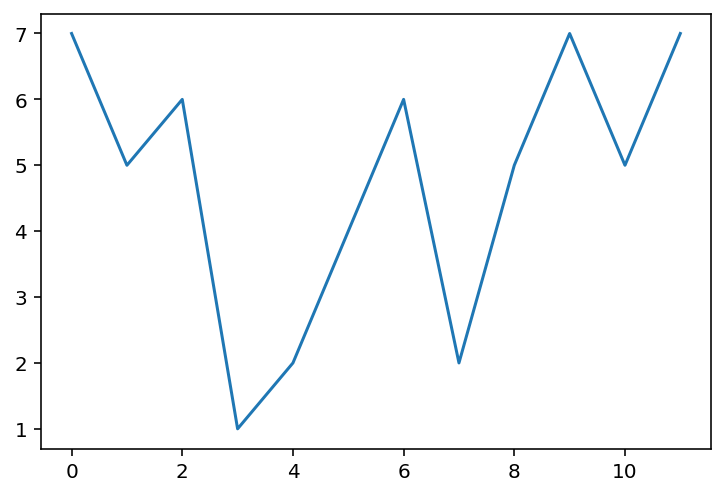

In [44]:
import matplotlib.pyplot as plt
plt.plot(v)

In [45]:
np.linalg.norm(np.zeros(3) - np.ones(3), ord=np.inf)

1.0

In [46]:
v[6] = -1
v

array([ 7,  5,  6,  1,  2,  4, -1,  2,  5,  7,  5,  7])

Watch out when creating sets.
In general, `{...}` and `set(..)` is the same, except when creating an empty set.
`{}` creates an empty dictionary instead:

In [47]:
print(type(set([1, 2])))
print(type({1,2}))
print(type(set()))
print(type({}))

<class 'set'>
<class 'set'>
<class 'set'>
<class 'dict'>


In [48]:
# setdiff
{2, 1, 1, 4} - set([5, 4, 6])

{1, 2}

In [49]:
# union
{2, 1}.union({3, 2, 4})

{1, 2, 3, 4}

In [50]:
# symmetric difference
{2, 1, 1, 4, 3}.symmetric_difference({5, 4, 3, 6})

{1, 2, 5, 6}

In [51]:
{1}.intersection({2, 1})

{1}

In [52]:
v > 5

array([ True, False,  True, False, False, False, False, False, False,
        True, False,  True])

In [53]:
v[v > 5]

array([7, 6, 7, 7])

`np.bincount` is similar to MATLAB's `accumarray` but it cannot handle negative numbers.

In [54]:
v[6] = 3
np.bincount(v)

array([0, 1, 2, 1, 1, 3, 1, 3])

In [55]:
np.unique(v)

array([1, 2, 3, 4, 5, 6, 7])

Note that adding lists in Python appends one list to the other, but in numpy this does an element-wise addition.
This means that numpy cannot add lists of different size.
This is similar when multiplying two vectors, or when multiplying with a scalar.

In [56]:
[1, 2] + [4, 3, 5]

[1, 2, 4, 3, 5]

In [57]:
np.array([1,2]) + np.array([4, 3])

array([5, 5])

In [58]:
2 * [1, 2]

[1, 2, 1, 2]

In [59]:
2 * np.array([1, 2])

array([2, 4])

Multiplying python lists gives an error:

In [60]:
[2, 3] * [3, 4]

TypeError: can't multiply sequence by non-int of type 'list'

Multiplying numpy lists gives the element-wise product (i.e., the hadamard product of two equal length arrays)

In [62]:
np.array([2, 3]) * np.array([1, 2])

array([2, 6])

## 98/99. Vector creation and timings

In [63]:
def loop(n):
    v = np.array([])
    for i in range(n):
        v.__add__(i)

def allocate(n):
    v = np.zeros(n)
    for i in range(n):
        v[i] = i

In [71]:
import localtime
n = [10000, 100000, 1000000, 10000000]

times = [[
    time.measure(i, lambda x: range(x)),
    time.measure(i, loop),
    time.measure(i, allocate)
  ] for i in n]

ModuleNotFoundError: No module named 'localtime'

time.struct_time(tm_year=2020, tm_mon=11, tm_mday=16, tm_hour=14, tm_min=13, tm_sec=3, tm_wday=0, tm_yday=321, tm_isdst=0)

In [ ]:
import pandas as pd
df = pd.DataFrame(times, columns=["range", "loop", "preallocated loop"], index=n)
df.plot.line(loglog=True, style='o-', grid=True)
plt.xlabel("vector length")
plt.ylabel("vector creation time")

## 122/123. Unique/sorting

In [74]:
H = np.array([7, 4, 4, 1, 5, 2, 3, 2, 9, 4, 6, 3, 7, 1]).reshape((-1, 2))
H.shape

(7, 2)

In [75]:
# https://stackoverflow.com/a/2828121/6629569
# Use -1 to reverse order
indices = np.lexsort((-H[:,0], -H[:,1]))
H[indices]

array([[9, 4],
       [7, 4],
       [6, 3],
       [5, 2],
       [3, 2],
       [7, 1],
       [4, 1]])

In [76]:
_, i = np.unique(H[:,1], return_index=True)
H[i]

array([[4, 1],
       [5, 2],
       [6, 3],
       [7, 4]])

In [78]:
!pip install numpy_indexed

Using the [numpy indexed](https://github.com/EelcoHoogendoorn/Numpy_arraysetops_EP) package which claims to be vectorised and built upon using `np.argsort`.

In [79]:
import numpy_indexed
_, max = numpy_indexed.group_by(H[:,1]).max(H)
max

array([[7, 1],
       [5, 2],
       [6, 3],
       [9, 4]])

## 128. Strings

In [80]:
str.split("let's split this string")

["let's", 'split', 'this', 'string']

In [81]:
"concatenate" + "strings"

'concatenatestrings'

## 131. Cell-arrays
Matlab cell arrays are regular Python lists -- conceptually!

In [82]:
c = ['a', 1, 'b']

In [83]:
c = [['club', ['seven', 'lady']], ['heart', ['two', 'king']]]
